# 9.1 핵심 개념
- 학습 데이터에 대해 여러 개의 부트스트랩 데이터를 생성하고 각 부트스트랩 데이터에 하나 혹은 여러 알고리즘을 학습시킨 후 산출된 결과 중 투표 방식에 의해 최종 결과 선정
- 부트스트랩 : 단순 복원추출 
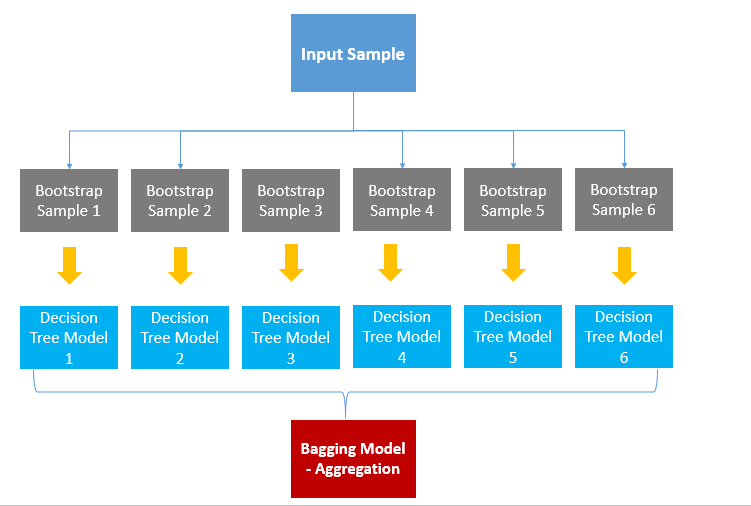

# 9.3 분석코드
## Part1. 분류

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42) 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(SVC(), random_state=0)
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)

print('TrainSet Score : ',model.score(X_scaled_train, y_train))
print('TestSet Score : ',model.score(X_scaled_test, y_test))

TrainSet Score :  0.982421875
TestSet Score :  0.9590643274853801


In [4]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_train=confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬 : \n', confusion_train)

cfreport_train=classification_report(y_train, pred_train)
print('분류예측 레포트 : \n',cfreport_train)

훈련데이터 오차행렬 : 
 [[329   4]
 [  5 174]]
분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.97      0.97       179

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [6]:
confusion_test=confusion_matrix(y_test, pred_test)
print('테스트데이터 오차행렬 : \n', confusion_test)

cfreport_test=classification_report(y_test, pred_test)
print('분류예측 레포트 : \n',cfreport_test)

테스트데이터 오차행렬 : 
 [[106   5]
 [  2  58]]
분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Part2. 회귀

In [8]:
data2=pd.read_csv("../data/house_price.csv", encoding='utf-8')

X=data2[data2.columns[:-1]]
y=data2[['house_value']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor(KNeighborsRegressor(), random_state=0)
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)

print('TrainSet Score : ',model.score(X_scaled_train, y_train))
print('TestSet Score : ',model.score(X_scaled_test, y_test))

TrainSet Score :  0.7316018746553036
TestSet Score :  0.6024268009648992


In [10]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))

print("훈련데이터 RMSE : ",RMSE_train)
print("테스트데이터 RMSE : ",RMSE_test)

훈련데이터 RMSE :  49447.095110855626
테스트데이터 RMSE :  60279.691922827755
